In [1]:
#This notebook is used to create Figure 19 in Reichl et al. 
# as submitted to ESS

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
from glob import glob
import gsw as gsw
import matplotlib as mpl


In [2]:
#Requires running notebook Buoy_Model_PDF_Comparison_Figures
Model = xr.open_dataset('../Data/ModelBuoy_Outputs.nc')

/tmp/ipykernel_3730599/1151995317.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = common_time.indexes['Time_'+LBL+'_'+Lon].to_datetimeindex()


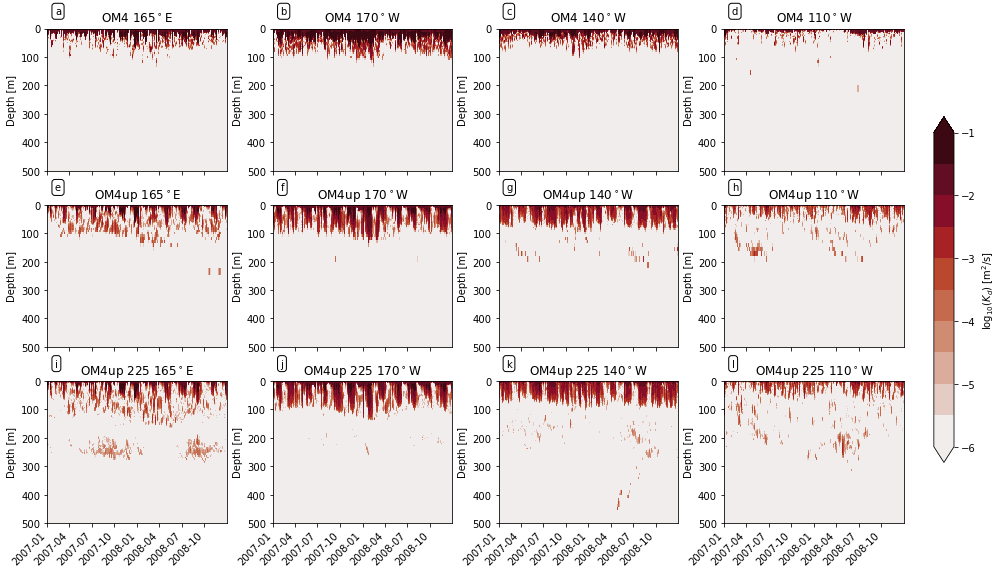

In [3]:
cmap=cmocean.cm.amp
levels=np.linspace(-6,-1,11)

fig,AX=plt.subplots(3,4,figsize=(14,8))
for mi,LBL in enumerate(['OM4','OM4up','OM4up 225']):
    DZ=500
    
    for i,Lon in enumerate(['165e','170w','140w','110w']):
        Lat='0n'

        Kd=Model['Kd_'+LBL+'_'+Lon].values
        Zi=Model['Z_'+LBL+'_'+Lon].values
        
        if (mi==0 and i==0):
            common_time = Model['Time_'+LBL+'_'+Lon]
            datetimeindex = common_time.indexes['Time_'+LBL+'_'+Lon].to_datetimeindex()
            common_time=datetimeindex
        a=AX.ravel()[i+mi*4]
        #Note that the time axis is sampled this way to work better with pcolormesh.  it
        # is not precisely correct, but the important thing is getting pcolormesh to know
        # the z bounds, since the time indices are too finely spaced to notice any difference.
        c=a.pcolormesh(common_time.values,Zi,np.log10(Kd[:-1,1:-1].T),
                       cmap=cmap,
                       #levels=levels
                       norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                        )
        a.set_ylim(DZ,0)
        a.set_xlim('2007/01/01','2008/12/31')
        a.set_ylabel('Depth [m]')
        a.set_title(LBL+' '+Lon[:-1]+'$^\circ$'+Lon[-1].upper())
        
fig.autofmt_xdate(rotation=45)  
fig.tight_layout()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.2, 0.02, 0.6])
cb=fig.colorbar(c, cax=cbar_ax,extend='both')
cb.set_label('$\log_{10}(K_d)$ [m$^2$/s]')

for AXi in range(0,12):
    txt='abcdefghijklmnopqrstuvwyxz'[AXi]
    AX.ravel()[AXi].text('2007-02',-50,txt,bbox=dict(boxstyle='round', facecolor='white'))

    
fig.savefig('../Fig/Kd_TimeSeries.png',dpi=200,bbox_inches = "tight")
      